# How to Train a Neural Network

The purpose of this presentation is to demonstrate the power of neural networks through training and hyperparameter tuning. The presentation follows the following format:
1. Identification of a Business Problem
2. Description of the Dataset
3. Why use Neural Networks (contrast with simple model)
4. Results and Business Impact
5. Next Steps/ Recommendations

**Business Problem**
Modern organizations (news outlets, financial firms, research institutions) handle huge volumes of unstructured text data — articles, reports, emails, documents.
Manually categorizing and tagging them by topic (e.g., Economics, Trade, Government, Markets) is time-consuming and inconsistent.

**Description of the Dataset**
For this example we're using the RCV1 dataset. This dataset is high dimensional (with about 47,000 word features)  and multi-label (where each news article can belong to multiple topics).

**Why use a Neural Network?**
A neural network can model non-linear patterns and complex word interactions better than simple linear classifiers. Compared to logistic regression, it can capture contextual relationships — for instance, “interest rates” and “central bank” appearing together are strong signals for Monetary Policy.

**Possible Business Applications**
A neural network can:
 1. Auto-tag incoming new articles by topic or indistry.
    2. Route content to specialized teams (e.g. Finance, Policy, Legal)
    3. Feed dashboards that track trends across topics over time.
    4. Speed up content indexing in news or financial analytics platforms

**How Businesses Can Use It?**
1. Media comapnies can use it to automatically organize content and improve search accuracy
2. Investment firms can use it to detect emerging trends or sector-specific developments in real-time news feeds
3. COnsulting / Research firms can use it to summarize and categorize large document corpora efficiently

## Step 1: Import the Relevant Libraries

In [1]:
#import required libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report
import numpy as np
import matplotlib.pyplot as plt

## Step 2: Import the Dataset ##

The RCV1 dataset (Reuters Corpus Volume I) is a large benchmark text dataset used for text classification, topic modeling, and NLP experiments. It contains over 800,000 manually categorized newswire stories from Reuters, covering topics like corporate/industrial news, economics, politics, and more. There are four major labels:
1. CCAT - Corporate/ Industrial
2. ECAT - Economics
3. GCAT - Government/ Social
4. MCAT - Markets

**Size:** approximately 800,000 documents
**Format**
When you load RCV1 using scikit-learn, you'll get a preprocessed machine learning ready version of the dataset. Here's what's inside:
| Attribute            | Description                                                                                                                            |
| -------------------- | -------------------------------------------------------------------------------------------------------------------------------------- |
| `rcv1.data`          | A **(804,414 × 47,236)** sparse TF-IDF matrix of features — each column represents a token (word or term).                             |
| `rcv1.target`        | A **multilabel matrix** (804,414 × 103) — each column is a topic category, and each row indicates which topics apply to that document. |
| `rcv1.sample_id`     | A list of 804,414 unique story IDs (e.g., `'2286'`, `'2994'`).                                                                         |
| `rcv1.target_names`  | The names of the 103 topic labels (e.g., `'C11'`, `'E51'`, `'G15'`, `'M14'`, etc.).                                                    |
                                                                                          |

**NOTE 1:** The rcv1.data is a sparse TF-IDF matrix meaning that it is already preprocessed and tokenized. It's in a numerical form and not human-readable words.

**NOTE 2:** TF-IDF stands for Term Frequency -Inverse Document Frequency. It's a numerical representation of how important each word (token) is to a document, compared to all other documents.
The dataset stores this as a matrix with:
1. Rows = documents
2. Columns = tokens (words or terms)
3. Cell value = TF-IDF score of that word in that document

**Note 3:** It's sparse because most documents don’t contain most words, so most values are 0.

Here's a simplified example of what a TF-IDF matrix can look like:
| Word  | oil  | germany | sony | inflation |
| ----- | ---- | ------- | ---- | --------- |
| Doc 1 | 0.34 | 0.00    | 0.00 | 0.00      |
| Doc 2 | 0.00 | 0.42    | 0.00 | 0.38      |
| Doc 3 | 0.00 | 0.00    | 0.46 | 0.00      |

**NOTE 4:** So the actual rcv1.data looks like a large (804,414 × 47,236) sparse matrix — about 47k unique tokens across 800k docs.


In [2]:
#load the data
from sklearn.datasets import fetch_rcv1
rcv1 = fetch_rcv1()

In [3]:
print(rcv1.DESCR)  # description of the dataset


.. _rcv1_dataset:

RCV1 dataset
------------

Reuters Corpus Volume I (RCV1) is an archive of over 800,000 manually
categorized newswire stories made available by Reuters, Ltd. for research
purposes. The dataset is extensively described in [1]_.

**Data Set Characteristics:**

==============     =====================
Classes                              103
Samples total                     804414
Dimensionality                     47236
Features           real, between 0 and 1
==============     =====================

:func:`sklearn.datasets.fetch_rcv1` will load the following
version: RCV1-v2, vectors, full sets, topics multilabels::

    >>> from sklearn.datasets import fetch_rcv1
    >>> rcv1 = fetch_rcv1()

It returns a dictionary-like object, with the following attributes:

``data``:
The feature matrix is a scipy CSR sparse matrix, with 804414 samples and
47236 features. Non-zero values contains cosine-normalized, log TF-IDF vectors.
A nearly chronological split is proposed in [1

In [4]:
print(rcv1.data.shape)    # the number of samples and features
print(rcv1.target.shape)  # the number of samples and labels


(804414, 47236)
(804414, 103)


In [6]:
print(rcv1.keys())

dict_keys(['data', 'target', 'sample_id', 'target_names', 'DESCR'])


## Step 3: Data Preprocessing

For the purposes of this demo and due to limited processing power, we would like to take a sample of the documents. It is also recommended to convert the sparse matric to a dense array.

**Dense tensor:** every element is stored explicitly (like a normal NumPy array).
**Sparse tensor:** only non-zero elements are stored, because most values are zero.

**NOTE:** This is important for our dataset as most words don’t appear in any given document so there are lots of zeros. Neural networks expect dense tensors because they do lots of matrix multiplications and need explicit values for every position.

In [7]:
#Convert the sparse matrix data to dense format
X = rcv1.data[:10000].toarray()
y = rcv1.target[:10000].toarray()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Split the data into training and testing sets

In [8]:
print(X_train.shape)
print(y_train.shape)

(8000, 47236)
(8000, 103)


## Step 4: Build the Nueral Network

In [23]:
#Build a baseline neural network model using Keras(Tensorflow)
model = models.Sequential([
    layers.InputLayer(shape=(X_train.shape[1],)),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(y_train.shape[1], activation='sigmoid')  # Sigmoid for multi-label classification
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Binary crossentropy for multi-label classification
              metrics=[tf.keras.metrics.AUC(curve='PR', multi_label=True, name='pr_auc')])
model.summary() 


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 512)            │    24,185,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 103)            │        13,287 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,264,295 (92.56 MB)

 Trainable params: 24,264,295 (92.56 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
#Train the network
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=10,
                    batch_size=32)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 36s 138ms/step - loss: 0.1479 - pr_auc: 0.0510 - val_loss: 0.0696 - val_pr_auc: 0.1772
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 33s 130ms/step - loss: 0.0574 - pr_auc: 0.2117 - val_loss: 0.0454 - val_pr_auc: 0.3515
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 36s 144ms/step - loss: 0.0371 - pr_auc: 0.3726 - val_loss: 0.0368 - val_pr_auc: 0.4463
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 33s 132ms/step - loss: 0.0262 - pr_auc: 0.4970 - val_loss: 0.0345 - val_pr_auc: 0.4907
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 34s 135ms/step - loss: 0.0200 - pr_auc: 0.5758 - val_loss: 0.0345 - val_pr_auc: 0.5322
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 35s 138ms/step - loss: 0.0158 - pr_auc: 0.6548 - val_loss: 0.0352 - val_pr_auc: 0.5500
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 34s 136ms/step - loss: 0.0129 - pr_auc: 0.7073 - val_loss: 0.0354 - val_pr_auc: 0.5724
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 36s 143ms/step - loss: 0.0109 - pr_auc: 0.7652 - val_loss: 0.0371 - val

In [25]:
#Evaluate the model on the test set
test_loss, test_pr_auc = model.evaluate(X_test, y_test, verbose=2)

63/63 - 1s - 10ms/step - loss: 0.0420 - pr_auc: 0.5708


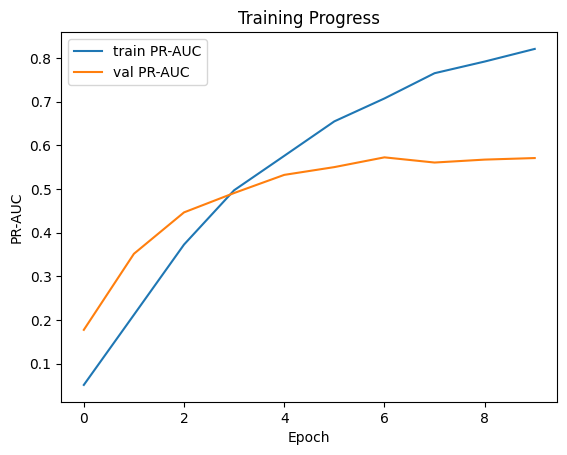

In [27]:
plt.plot(history.history['pr_auc'], label='train PR-AUC')
plt.plot(history.history['val_pr_auc'], label='val PR-AUC')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('PR-AUC')
plt.title('Training Progress')
plt.show()

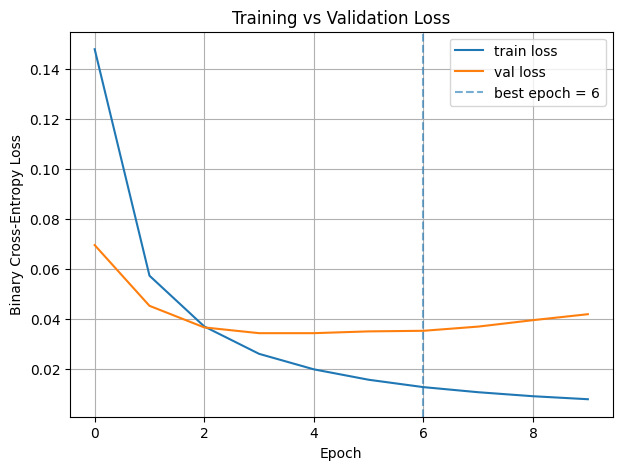

In [28]:
# --- Find best epoch by validation PR-AUC
val_pr = np.array(history.history['val_pr_auc'])
best_epoch = int(val_pr.argmax())

# --- Plot loss
plt.figure(figsize=(7,5))
plt.plot(history.history['loss'],     label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.axvline(best_epoch, ls='--', alpha=0.6, label=f'best epoch = {best_epoch}')
plt.xlabel('Epoch')
plt.ylabel('Binary Cross-Entropy Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

In [29]:
#predict probabilities on test set
y_pred = model.predict(X_test, batch_size=512)

# Convert probabilities → 0/1 predictions using threshold (say 0.5)
y_pred_binary = (y_pred >= 0.5).astype(int)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


In [31]:
print("Micro F1:", f1_score(y_test, y_pred_binary, average='micro'))
print("Macro F1:", f1_score(y_test, y_pred_binary, average='macro'))
print("Classification Report:\n", classification_report(y_test, y_pred_binary))


Micro F1: 0.8171093948909446
Macro F1: 0.4563834405389547
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.12      0.21        58
           1       0.90      0.64      0.75        28
           2       0.66      0.24      0.35        89
           3       0.50      0.06      0.11        16
           4       0.93      0.90      0.92       397
           5       0.94      0.89      0.91       232
           6       0.95      0.62      0.75        34
           7       0.89      0.78      0.83       178
           8       1.00      0.20      0.33         5
           9       0.84      0.62      0.72        95
          10       0.85      0.45      0.59        38
          11       0.85      0.55      0.67        20
          12       1.00      0.20      0.33         5
          13       0.93      0.70      0.80        20
          14       0.85      0.60      0.70       119
          15       0.78      0.53      0.63        99

c:\Users\kadickson\AppData\Local\anaconda3\envs\nn_env\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\kadickson\AppData\Local\anaconda3\envs\nn_env\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\kadickson\AppData\Local\anaconda3\envs\nn_env\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(aver

In [32]:
#show some example predictions
for i in range(5):
    print(f"Sample {i+1}:")
    print("True labels: ", np.where(y_test[i]==1)[0])
    print("Predicted labels: ", np.where(y_pred_binary[i]==1)[0])
    print()

Sample 1:
True labels:  [ 44  46  59  94 102]
Predicted labels:  [ 44  46  59  94 102]

Sample 2:
True labels:  [ 4  7 33]
Predicted labels:  [ 4  5  7 33]

Sample 3:
True labels:  [44 46 59]
Predicted labels:  [44 46 59]

Sample 4:
True labels:  [ 4  7 22 33]
Predicted labels:  [ 4  7 33]

Sample 5:
True labels:  [ 4  5 33]
Predicted labels:  [ 4  5 33]

